1a. Naive Bayes – Cancer Tumor Classification
For this part, you will focus on a cancer dataset that comprises of 569 rows and 32 columns and perform Naive Bayes Classification.

● Write a report with screenshots of your results and the final results for step 8.
● Submit your code as an .ipynb file and a document reporting your findings.

In [58]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import  confusion_matrix, accuracy_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
'''
Load the dataset from ‘cancer.csv’ into a pandas DataFrame and print it along with its shape. 
‘diagnosis’ is the target variable.
'''
df = pd.read_csv("cancer.csv")
df = df.drop(columns=["Unnamed: 32"]) #all Nan and can't have that for GaussianNB
print(df)
print(df.shape)
#Print the column names and the data type of each column.
print(df.dtypes)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

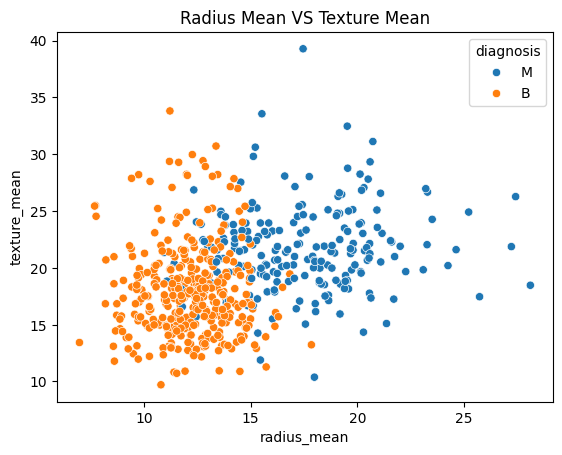

In [60]:
#Plot the ‘Radius Mean’ VS ‘Texture Mean’ along with the classes represented as colors or shapes.

sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Radius Mean VS Texture Mean')
plt.show()


Is the data linearly separable?

Yes. There looks to be a diagonal line with a negative slope and a high intercept (around or above 40) that can separate diagnoses of 'M' and 'B'

In [61]:
#Perform encoding on the target variable.
le = preprocessing.LabelEncoder()
label=le.fit_transform(df["diagnosis"])

#Divide the data into X and Y, where X is the set of features and Y is the target variable.
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

#Split the data into train and test data. Choose a split size of 70 - 30.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Given the nature of the data and its features, choose which Naive Bayes is the most suitable. 
Mention this in your report along with why you chose the same.

We chose a Gaussian Naive Bayes, since all of the features are continuous, not categorical.

In [62]:
#Once you have trained your model, evaluate the model performance by printing the performance matrix.

model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Performance/Confusion Matrix")
print(cm)



Performance/Confusion Matrix
[[107   1]
 [ 61   2]]


1b. Comparative Analysis – Cancer Tumor Classification

Train Additional Models

In addition to Naive Bayes, train the following models on the same training data:

i. Logistic Regression

ii. K-Nearest Neighbors (KNN) (use k=5)

In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)
logreg_y_pred = logreg_model.predict(X_test)

In [64]:
#K-Nearest Neighbors (KNN) (use k=5)
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)

In [65]:
'''
Evaluate Model Performances
For each model (Naive Bayes, Logistic Regression, KNN) print the accuracy, precision, recall, F1-score
'''
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_y_pred))
print("KNN Accuracy:", accuracy_score(y_test, knn_y_pred))

print("Gaussian Naive Bayes Report:")
print(classification_report(y_test, y_pred))

# Logistic Regression
print("Logistic Regression Report:")
print(classification_report(y_test, logreg_y_pred))

# K-Nearest Neighbors
print("KNN Report:")
print(classification_report(y_test, knn_y_pred))

Naive Bayes Accuracy: 0.6374269005847953
Logistic Regression Accuracy: 0.9532163742690059
KNN Accuracy: 0.7134502923976608
Gaussian Naive Bayes Report:
              precision    recall  f1-score   support

           B       0.64      0.99      0.78       108
           M       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171

Logistic Regression Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

KNN Report:
              precision    recall  f1-score   support

           B       0.72      0.89      0.80       108
           M       0.68      0.41      0.51  

Comparative Analysis

Compare the three models based on their performance. Include this comparison and discussion in your final report or in a mark_down cell.

Which model performs best?

The Logistic Regression Model Performs the best. Both its F1 and Accuracy score are the highest. Considering the data was imbalanced, since the F1 score was the highest, Logistic Regression performs best.

Which model would you recommend for this task, and why?

As the F1 score for Logistic Regression is highest and the data is imbalanced (see observations below), I would recommend the Logistic Regression Model.

Discuss any interesting observations regarding model performance.

When you look at the confusion matrix, you can see that there aren't that many real negatives — meaning the data was relatively imbalanced. There were 3 real negatives and 168 real positives.